__HOMEWORK 12__
<br>
Full Name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

In [1]:
import random

## Exercise 1
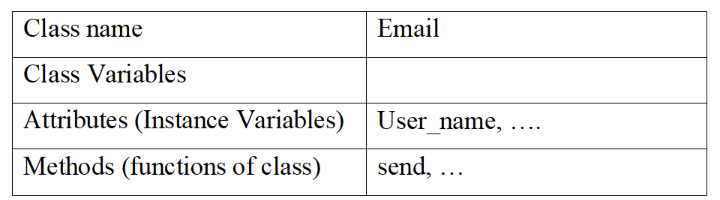

In [2]:
class Email:
    username_created = []
    email_created = []
    
    #Created email
    def __init__(self, name = None):
        character_accepted = [chr(i) for i in range(ord('a'), ord('z')+1)]
        character_accepted.extend(str(i) for i in range(0, 10))
        if name == None:
            name = input("Username (only contains a-z or 0-9): ")
        while (name in Email.username_created) or any(i not in character_accepted for i in name):
            while any(i not in character_accepted for i in name):
                name = input(">>> Invalid character!\n\nUsername (only contains a-z or 0-9): ")
            while name in Email.username_created:
                name = input(">>> Username used!\n\nUsername (only contains a-z or 0-9): ")
        Email.username_created.append(name)
        self.name = name
        self.email = name + '@dseb.mfe.vn'
        Email.email_created.append(self.email)
        self.inbox = []
        
    #Send Email
    def send(self, receiver, mess = None):
        #delete if inbox has over 10 messages
        if mess == None:
            mess = input("Message: ")
        if len(receiver.inbox) >= 10:
            del receiver.inbox[0]
        receiver.inbox.append(f"{self.email}: {mess}")

### Create New Email

In [3]:
user1 = Email('minhngoc753')
print(Email.username_created)
print(Email.email_created)

['minhngoc753']
['minhngoc753@dseb.mfe.vn']


In [4]:
user2 = Email('Hoàng Ngân')
print('\n', Email.username_created, sep = '')
print(Email.email_created)


['minhngoc753', 'hoangngan313']
['minhngoc753@dseb.mfe.vn', 'hoangngan313@dseb.mfe.vn']


In [5]:
user3 = Email('hoangngan313')
print('\n', Email.username_created, sep = '')
print(Email.email_created)


['minhngoc753', 'hoangngan313', 'thphuong']
['minhngoc753@dseb.mfe.vn', 'hoangngan313@dseb.mfe.vn', 'thphuong@dseb.mfe.vn']


### Send Email

In [6]:
user1.send(user2, 'Hello')
print(user2.inbox)

user1.send(user2)
print(user2.inbox)

['minhngoc753@dseb.mfe.vn: Hello']
['minhngoc753@dseb.mfe.vn: Hello', 'minhngoc753@dseb.mfe.vn: Xin Chào']


### Delete if inbox has over 10 messages

In [7]:
for i in range(15):
    user1.send(user3, f'mess {i+1}')
user3.inbox

['minhngoc753@dseb.mfe.vn: mess 6',
 'minhngoc753@dseb.mfe.vn: mess 7',
 'minhngoc753@dseb.mfe.vn: mess 8',
 'minhngoc753@dseb.mfe.vn: mess 9',
 'minhngoc753@dseb.mfe.vn: mess 10',
 'minhngoc753@dseb.mfe.vn: mess 11',
 'minhngoc753@dseb.mfe.vn: mess 12',
 'minhngoc753@dseb.mfe.vn: mess 13',
 'minhngoc753@dseb.mfe.vn: mess 14',
 'minhngoc753@dseb.mfe.vn: mess 15']

## Exercise 2
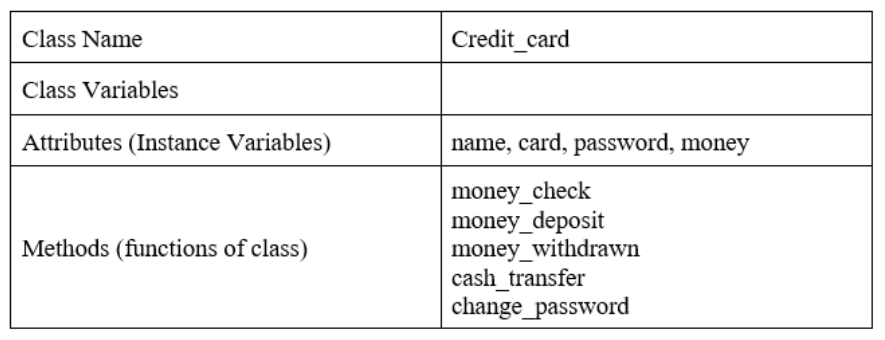

In [10]:
class Credit_card:
    card_created = []
    users = {}
    
    # Create New Credit Card (if you have not got a credit card yet, the card number will be a random 10-digit number): 
    def __init__(self, name = None, card = None, password = None, money = 0):
        self.user_infor = []
        if card == None:
            card = random.randint(1000000000, 9999999999)
        while card in Credit_card.card_created:
            card = random.randint(1000000000, 9999999999)
        Credit_card.card_created.append(card)
        self.card = card
        #username
        if name == None:
            name = input('Create Username: ')
        self.name = name.upper()
        #password
        if password == None:
            password = input("Create Password: ")
        self.password = password
        self.money = money
        self.user_infor.extend([self.card, self.name.upper(), self.password, self.money])
        Credit_card.users[card] = self.user_infor[1::]
        
    #Management Money
    def money_check(self):
        self.pass_check = input("Enter Your Password: ")
        while self.pass_check != self.password:
            self.pass_check = input(">>> Incorrect\n\nEnter Your Password: ")
        print(f'\t> Your Account: {self.user_infor[-1]}')
        
    def money_deposit(self, moneyin = None):
        self.pass_check = input("Enter Your Password: ")
        while self.pass_check != self.password:
            self.pass_check = input(">>> Incorrect\n\nEnter Your Password: ")
        if moneyin == None:
            moneyin = int(input("\t> Cash deposited: "))
        self.money += moneyin
        self.user_infor[-1] = self.money
        print(f'\t> Your Account: {self.user_infor[-1]}')
        Credit_card.users[self.card] = self.user_infor[1::]
    
    def money_withdrawn(self, moneyout = None):
        self.pass_check = input("Enter Your Password: ")
        while self.pass_check != self.password:
            self.pass_check = input(">>> Incorrect\n\nEnter Your Password: ")
        if moneyout == None:
            moneyout = int(input("\t> Cash withdrawn: "))
        #check if your bank account is not enough to withdrawn
        while moneyout > self.user_infor[-1]:
            moneyout = int(input("\t> Not enough. Try again: "))
        self.money -= moneyout
        self.user_infor[-1] = self.money
        print(f'\t> Your Account: {self.user_infor[-1]}')
        Credit_card.users[self.card] = self.user_infor[1::]
        
    def cash_transfer(self, receiver, moneytransfer = None):
        self.pass_check = input("Enter Your Password: ")
        while self.pass_check != self.password:
            self.pass_check = input(">>> Incorrect\n\nEnter Your Password: ")
        if moneytransfer == None:
            moneytransfer = int(input("\t> Cash Transfer: "))
        while moneytransfer > self.user_infor[-1] or moneytransfer < 50000:
            while moneytransfer > self.user_infor[-1]:
                moneytransfer = int(input("\t> Not enough. Try again: "))
            while moneytransfer < 50000:
                moneytransfer = int(input("\t> Transfering at least 50000. Try again: "))
        self.money -= moneytransfer 
        self.user_infor[-1] = self.money
        receiver.money += moneytransfer
        receiver.user_infor[-1] = receiver.money
        Credit_card.users[self.card] = self.user_infor[1::]
        Credit_card.users[receiver.card] = receiver.user_infor[1::]
        
        
    def change_password(self, newpass = None):
        if newpass == None:
            print('>>> Password unchanged')
        else:
            self.password = newpass
            print('>>> Password has been changed successfully.')
        self.user_infor[-2] = self.password
        Credit_card.users[self.card] = self.user_infor[1::]

### Create New Credit Card

In [11]:
user1 = Credit_card()
print(Credit_card.users)

{1474812482: ['NGUYỄN THỊ MINH NGỌC', 'mn123', 0]}


In [12]:
user2 = Credit_card(name = 'Trần Hoàng Ngân', password = 'nganhoang@1294', money = 100000)
print(Credit_card.users)

{1474812482: ['NGUYỄN THỊ MINH NGỌC', 'mn123', 0], 8597235792: ['TRẦN HOÀNG NGÂN', 'nganhoang@1294', 100000]}


### Depositing Cash

In [13]:
user1.money_deposit()

	> Your Account: 2000000


### Withdrawing Cash

In [15]:
user1.money_withdrawn()

	> Your Account: 700000


### Changing Password

In [16]:
user1.change_password('mn753')

>>> Password has been changed successfully.


In [17]:
user2.change_password()

>>> Password unchanged


### Cash Transfer

In [18]:
user1.cash_transfer(user2)

### Money Check

In [19]:
user1.money_check()

	> Your Account: 600000


In [20]:
user2.money_check()

	> Your Account: 200000


### List of Users

In [21]:
print(Credit_card.users)

{1474812482: ['NGUYỄN THỊ MINH NGỌC', 'mn753', 600000], 8597235792: ['TRẦN HOÀNG NGÂN', 'nganhoang@1294', 200000]}
